In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('../data/players_17.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,68+4,66+4,66+4,66+4,68+4,65+4,58+4,58+4,58+4,65+4


In [3]:
# Drop the Goalkeepers beacuse they lack a lot of variables

df = df.loc[df['player_positions']!='GK']
df['player_positions'].value_counts()

CB                 2097
ST                 1794
CM                  847
LB                  799
RB                  689
                   ... 
CF, ST, RM, LM        1
CDM, RM, LM           1
CF, ST, CAM, RM       1
LM, CM, RM, LW        1
RW, LW, CM            1
Name: player_positions, Length: 714, dtype: int64

In [5]:
df = df [['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions', 'mentality_composure',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']]

In [43]:
df.shape

(15084, 69)

In [44]:
df20 = pd.read_csv('../data/players_20.csv')
df20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [45]:
df20 = df20[['sofifa_id', 'overall']]

In [46]:
df20.columns = ['sofifa_id', 'overall_20']

In [47]:
df1720 = df.merge(df20, on='sofifa_id')
df1720.shape

(8291, 70)

In [11]:
df1720.isna().sum()

sofifa_id     0
age           0
height_cm     0
weight_kg     0
overall       0
             ..
lcb           0
cb            0
rcb           0
rb            0
overall_20    0
Length: 70, dtype: int64

In [12]:
df1720.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8291 entries, 0 to 8290
Data columns (total 70 columns):
sofifa_id                     8291 non-null int64
age                           8291 non-null int64
height_cm                     8291 non-null int64
weight_kg                     8291 non-null int64
overall                       8291 non-null int64
potential                     8291 non-null int64
value_eur                     8291 non-null int64
wage_eur                      8291 non-null int64
pace                          8291 non-null float64
shooting                      8291 non-null float64
passing                       8291 non-null float64
dribbling                     8291 non-null float64
defending                     8291 non-null float64
physic                        8291 non-null float64
attacking_crossing            8291 non-null object
attacking_finishing           8291 non-null object
attacking_heading_accuracy    8291 non-null object
attacking_short_passing     

In [13]:
# A lot of numerical varaibles are formatted as strings because they contain signs + or -

objects = df1720.select_dtypes(['object'])
objects.columns

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [14]:
# defining a function to get the number before the sign (+ or -)

def get_value(x):
    if '+' in x:
        return x.split('+')[0]
    elif '-' in x:
        return x.split('-')[0]
    else:
        return x

In [15]:
# applying the function to all the columns with values as strings with + or -

cols = ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
    
for col in cols:
    df1720[col] = df1720[col].apply(get_value)
    df1720[col] = pd.to_numeric(df1720[col])

In [16]:
df1720.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8291 entries, 0 to 8290
Data columns (total 70 columns):
sofifa_id                     8291 non-null int64
age                           8291 non-null int64
height_cm                     8291 non-null int64
weight_kg                     8291 non-null int64
overall                       8291 non-null int64
potential                     8291 non-null int64
value_eur                     8291 non-null int64
wage_eur                      8291 non-null int64
pace                          8291 non-null float64
shooting                      8291 non-null float64
passing                       8291 non-null float64
dribbling                     8291 non-null float64
defending                     8291 non-null float64
physic                        8291 non-null float64
attacking_crossing            8291 non-null int64
attacking_finishing           8291 non-null int64
attacking_heading_accuracy    8291 non-null int64
attacking_short_passing       8

In [17]:
# Now all features are numeric

In [18]:
# Finding 2017 features that better correlate with overall_20 (target variable)

a = df1720.corr()['overall_20'].sort_values(ascending=False)[1:]
correlations_df = pd.DataFrame(a)
correlations_df

,overall_20
overall,0.752290
potential,0.699661
movement_reactions,0.627264
value_eur,0.604063
wage_eur,0.597665
...,...
defending_marking,0.113115
weight_kg,0.079791
movement_balance,0.070243
height_cm,0.050384


In [19]:
# List of variables that correlate better than 0.1 (from overall to age)

best_corr = correlations_df.loc[correlations_df['overall_20'] >= 0.1]
print(list(best_corr.index))

['overall', 'potential', 'movement_reactions', 'value_eur', 'wage_eur', 'lcm', 'rcm', 'cm', 'skill_ball_control', 'attacking_short_passing', 'lm', 'rm', 'ram', 'cam', 'lam', 'rs', 'ls', 'st', 'cf', 'lf', 'rf', 'mentality_composure', 'passing', 'rw', 'lw', 'dribbling', 'skill_long_passing', 'rwb', 'lwb', 'power_shot_power', 'skill_dribbling', 'cdm', 'ldm', 'rdm', 'mentality_vision', 'skill_curve', 'shooting', 'power_long_shots', 'rb', 'lb', 'attacking_crossing', 'attacking_volleys', 'mentality_positioning', 'skill_fk_accuracy', 'mentality_penalties', 'attacking_heading_accuracy', 'attacking_finishing', 'physic', 'power_stamina', 'mentality_aggression', 'lcb', 'rcb', 'cb', 'movement_agility', 'pace', 'movement_sprint_speed', 'mentality_interceptions', 'movement_acceleration', 'power_strength', 'defending', 'age', 'defending_standing_tackle', 'power_jumping', 'defending_sliding_tackle', 'defending_marking']


### Select k best features

In [20]:
# We want to find 10 best features

from sklearn.feature_selection import SelectKBest, f_regression

def select_kbest_clf(data_frame, target, k=10):
   
    feat_selector = SelectKBest(f_regression, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["p_value"] = feat_selector.pvalues_
    feat_scores["k_first"] = feat_selector.get_support()
    feat_scores["variable"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores.loc[feat_scores['k_first']==True] 

select_kbest_clf(df1720, 'overall_20', k=10)


,F Score,p_value,k_first,variable
4,10807.441054,0.0,True,overall
5,7948.854654,0.0,True,potential
6,4762.330965,0.0,True,value_eur
7,4606.220545,0.0,True,wage_eur
17,3579.080773,0.0,True,attacking_short_passing
23,4015.256347,0.0,True,skill_ball_control
27,5377.056877,0.0,True,movement_reactions
55,4259.821686,0.0,True,lcm
56,4259.821686,0.0,True,cm
57,4259.821686,0.0,True,rcm


In [21]:
top10corr = ['overall', 'potential', 'movement_reactions', 'value_eur', 'wage_eur', 'lcm', 'rcm', 
             'cm', 'skill_ball_control', 'attacking_short_passing']

# the 10 best features extracted by kbest are the same as the top 10 variables correlating with overall_20

In [22]:
# To create our model we keep those 10 features

df_ml = df1720[['overall', 'potential', 'movement_reactions', 'value_eur', 'wage_eur', 'lcm', 'rcm', 
             'cm', 'skill_ball_control', 'attacking_short_passing', 'overall_20']]

In [23]:
df_ml.isna().sum()

overall                    0
potential                  0
movement_reactions         0
value_eur                  0
wage_eur                   0
lcm                        0
rcm                        0
cm                         0
skill_ball_control         0
attacking_short_passing    0
overall_20                 0
dtype: int64

## Train-test split

In [24]:
from sklearn.model_selection import train_test_split

X = df_ml.drop(columns='overall_20')
y = df_ml['overall_20']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

print('R-squared Train: ', r2_score(y_train, y_pred))
print('Mean Absolute Error Train: ', mean_absolute_error(y_train, y_pred), '\n')

y_pred_test = lr.predict(X_test)

print('R-squared Test: ', r2_score(y_test, y_pred_test))
print('Mean Absolute Error Test: ', mean_absolute_error(y_test, y_pred_test), '\n')
print('Root Mean Squared Error Test: ', np.sqrt(mean_squared_error(y_test, y_pred_test)), '\n')




R-squared Train:  0.6260134301290459
Mean Absolute Error Train:  2.6920149445930486 

R-squared Test:  0.6518259878323762
Mean Absolute Error Test:  2.6872496561217725 

Root Mean Squared Error Test:  3.447065902142165 



In [26]:
# Calculating RMSE in proportion to the mean of overall_20

rmse =  np.sqrt(mean_squared_error(y_test, y_pred_test))
target_mean = df1720.overall_20.mean()
print('RMSE vs target mean: ', (100*rmse/target_mean), '%')

RMSE vs target mean:  4.93436983997802 %


In [27]:
# Comparing predicted values with our model to actual values

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

results = results.head(25)
results

,Actual,Predicted
4200,69,69.597266
7557,62,67.875657
6563,63,64.857846
2265,72,72.802002
3790,68,69.150491
2843,70,71.065073
3350,65,69.448709
2247,73,72.792999
4619,64,68.961114
6649,67,68.021548


<Figure size 864x504 with 0 Axes>

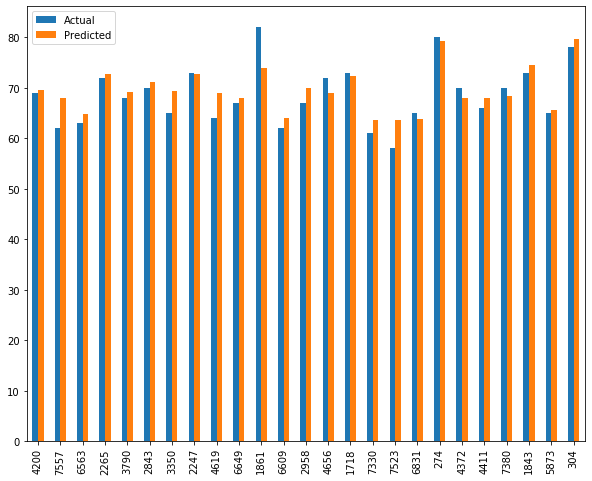

In [29]:
# Comparing predicted values with our model to actual values

plt.figure(figsize=(12,7))
results.plot(kind='bar',figsize=(10,8))
plt.show()

## Applying the model to FIFA 20 to predict overall 2023

In [30]:
df2020 = pd.read_csv('../data/players_20.csv')
df2020.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [31]:
# Drop the Goalkeepers

df2020 = df2020.loc[df2020['player_positions']!='GK']
df2020['player_positions'].value_counts()

CB              2322
ST              1809
CM               786
CDM, CM          731
CM, CDM          682
                ... 
LB, CDM, LM        1
CF, CAM, RW        1
LW, CF, ST         1
CDM, LWB, CM       1
CB, LWB, LB        1
Name: player_positions, Length: 642, dtype: int64

In [32]:
objects = df2020.select_dtypes(['object'])
objects.columns

Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [33]:
# defining a function to get the number before the sign (+ or -)

def get_value(x):
    if '+' in x:
        return x.split('+')[0]
    elif '-' in x:
        return x.split('-')[0]
    else:
        return x
    
# applying the function to all the columns with values as strings with + or -

cols = ['lcm', 'rcm', 'cm']
    
for col in cols:
    df2020[col] = df2020[col].apply(get_value)
    df2020[col] = pd.to_numeric(df2020[col])

In [34]:
#Selecting same columns to pass them through the model

df_ml2023 = df2020[['overall', 'potential', 'movement_reactions', 'value_eur', 'wage_eur', 'lcm', 'rcm', 
             'cm', 'skill_ball_control', 'attacking_short_passing']]

In [35]:
df_ml2023.isna().sum()

overall                    0
potential                  0
movement_reactions         0
value_eur                  0
wage_eur                   0
lcm                        0
rcm                        0
cm                         0
skill_ball_control         0
attacking_short_passing    0
dtype: int64

In [36]:
y_pred_2023 = lr.predict(df_ml2023)

In [40]:
# New dataframe containing predictions

predictions_df = pd.DataFrame()
predictions_df['sofifa_id'] = df2020['sofifa_id']
predictions_df['name'] = df2020['short_name']
predictions_df['club'] = df2020['club']
predictions_df['overall_2020'] = df2020['overall']
predictions_df['predicted_overall_2023'] = y_pred_2023

In [41]:
predictions_df.head(25)

,sofifa_id,name,club,overall_2020,predicted_overall_2023
0,158023,L. Messi,FC Barcelona,94,102.339826
1,20801,Cristiano Ronaldo,Juventus,93,95.956756
2,190871,Neymar Jr,Paris Saint-Germain,92,96.748913
4,183277,E. Hazard,Real Madrid,91,98.252710
5,192985,K. De Bruyne,Manchester City,91,96.355639
7,203376,V. van Dijk,Liverpool,90,91.794835
8,177003,L. Modrić,Real Madrid,90,91.831675
9,209331,M. Salah,Liverpool,90,92.611113
10,231747,K. Mbappé,Paris Saint-Germain,89,93.191873
11,201024,K. Koulibaly,Napoli,89,89.761129


In [42]:
#predictions_df.to_csv('../data/predictions_2023.csv', index=False)